# Aplicatii SVD: Analiza componentelor principale si reducerea dimensionala

In acest laborator practic, vom vedea care sunt pasii algoritmului PCA(Principal Component Analysis) si pentru ce avem nevoie (adica la ce poate fi folosit acest algoritm), si vom studia reducerea dimensionala eficienta a factorizarii SVD.

### Notiuni matematice importante

Pentru a intelege ceea ce se intampla in cadrul analizei componentelor principale, vom avea nevoie de scurte notiuni din cadrul statisticii, care se studiaza, in general, la Mate3. Nestiind insa daca s-a ajuns cu materia pana in acest punct, vom prezenta ideile principale de care avem nevoie in continuare.

Vom lua un vector, sa il denumim X, care arata in genul:

In [2]:
X = [1 2 4 6 12 15 25 45 68 67 65 98]

X =

    1    2    4    6   12   15   25   45   68   67   65   98



Pentru a avea o imagine de ansamblu mai buna, vom transpune vectorul dat.

In [3]:
X = X'

X =

    1
    2
    4
    6
   12
   15
   25
   45
   68
   67
   65
   98



Numim <b><u>media unui vector</u></b> media aritmetica a tutror elementelor, pe care o notam cu $\bar{X}$.

$\bar{X} = \frac{\sum_{i=1}^{n}X_i}{n}$, unde X<sub>i</sub> este elementul de pe pozitia "i" din vectorul X.

In cazul nostru, media este:

In [4]:
mean(X)

ans =  34


Totusi, media nu ne poate da detalii exacte in legatura cu fiecare element al vectorului. Iata aici un alt exemplu, in care avem doi vectori total diferiti:

In [5]:
x = [0 8 12 20];
x = x'
y = [8 9 11 12];
y = y'

x =

    0
    8
   12
   20

y =

    8
    9
   11
   12



Daca ar fi sa calculam media pentru fiecare dintre cei doi vectori, vom obtine:

In [6]:
mean(x)
mean(y)

ans =  10
ans =  10


Media, este aceeasi, desi vectorii nu sunt nici pe departe asemanatori!

Ne trebuie ceva mai puternic deci, un lucru care este numit <b><u>Deviere Standard</u></b>. Ce inseamna asta?
Devierea standard este definita ca distanta medie de la MEDIA VECTORULUI la un punct din setul de date. Din nou, ce vrea sa insemne asta? In mod practic, este ceva foarte asemanator calcului erorilor de la fizica (nu intram in detalii de genul insa, calm).

Notatia si formula ei sunt: $s = \sqrt{\frac{\sum_{i=1}^{n}(X_i - \bar{X})^2}{n-1}}$.

Desigur, in alte carti/locuri veti intalni alte notatii, irelevant acum.

Fun fact: vedem acolo o impartire la n-1 ci nu la n, care parea mai logica. Adica, de ce n-1? Ei bine, raspunsul este unul putin mai complicat, dar s-a constatat experimental ca folosind formula cu n-1 rezulta o deviere standard mai apropape de realitate fata de cazul in care am folosi n. Pentru cei care sunt intr-adevar pasionati de astfel de fenomene "mai abstracte", oferim si o sursa de aprovizionare informationala:
http://mathcentral.uregina.ca/RR/database/RR.09.95/weston2.html

Hai sa scriem putin cod pentru a obtine devierea standard:

In [7]:
function s = DeviereStandard(x)
    medie = mean(x);

    %obtinem un vector cu toate elementele media vectorului initial
    %il vom afisa, ca sa intelegem cum arata el
    x_bar = ones(size(x,1),1) * medie
    s = sqrt( sum((x - x_bar) .^ 2) / (size(x,1) - 1))
endfunction

In [8]:
DeviereStandard(x)
DeviereStandard(y)

x_bar =

   10
   10
   10
   10

s =  8.3267
ans =  8.3267
x_bar =

   10
   10
   10
   10

s =  1.8257
ans =  1.8257


Iata deci ca devierea standard "ne spune mai multe" despre un set de date, decat media setului respectiv.
Daca devierea standard a lui x este 8.32, asta ne spune ca datele acestuia <b><u>VARIAZA</u></b> mai mult in comparatie cu datele lui y.

### Varianta si Covarianta

<b>Varianta</b> este un alt tip de masura a raspandirii datelor in setul nostru de date. Ca si formula, variatia nu este altceva decat devierea standard la patrat. Simbolul este, de asemenea, s<sup>2</sup> :)

Motivul pentru care am introdus varianta este pentru a putea explica mai usor ceea ce este aceea o covarianta, dar si pentru ca avem nevoie (intr-o oarecare masura) de aceasta.

<b>Covarianta</b> este foarte importanta, deoarece aceasta ne prezinta o legautra intre dimensiunile diferite ale datelor dintr-un set. Ce vrem sa spunem este ca, pana acum, am vazut situatia datelor intr-un plan 1-dimensional, adica o singura coloana. Dar daca setul nostru de date este n-dimensional, atunci ce putem face? Aici apare si covarianta.


Un set de date n-dimensional nu presupune, in sine si de drept, decat o matrice cu un numar m de linii, si un numar exact de coloane, n (de aici si n-dimensional). Ceea ce ne ofera varianta este situatia pe o singura coloana, adica pentru o singura dimensiune. Dar datele noastre sunt reprezentate poate in plan 3D, prin urmare vrem sa avem o legatura intre cele 3 planuri, ex XoY, XoZ si YoZ. Acest lucru este dat, cum era de asteptat, de catre covarianta.

Notatia si formula standard pentru covarianta intre doua dimensiuni sunt urmatoarele:
$cov(X,Y) = \frac{\sum_{i=1}^{n}(X_i - \bar{X}) \cdot (Y_i - \bar{Y})}{n - 1}$

Acum, fara mare efort, putem introduce si notiunea de <b><u>Matrice de covarianta</u></b>.

Sa zicem ca avem un set de date format in felul urmator: se doreste sa se afle varsta medie de viata a unui barbat, respectiv a unei femei. Pe prima linie vom avea un numar de 7 varste a 7 barbati diferiti, urmand ca pe cea de a doua linie sa fie varstele a 7 femei diferite. Persoanele din studiu sunt deja decedate :(, acest lucru fiind insa necesar pentru a putea afla detaliile esentiale.

In [9]:
X = [67 85 72 66 59 53 72; 69 77 91 53 49 76 68]

X =

   67   85   72   66   59   53   72
   69   77   91   53   49   76   68



In continuare, vom scrie o functie scurta de calculare a covariantei, inspirata din calcularea devierii standard.
Speram ca se observa usor ca pentru a calcula varianta, trebuie sa dam de doua ori acelasi parametru.

In [10]:
function covar = Covarianta(x, y)
    medie_x = mean(x);
    medie_y = mean(y);

    x_bar = ones(1,size(x,2)) * medie_x;
    y_bar = ones(1,size(x,2)) * medie_y;
    covar = (sum((x - x_bar) .* (y - y_bar)) )/ (size(x,2) - 1);
endfunction

Haide sa luam x prima linie a lui X, corespunzatoare barbatilor, si y a doua coloana din X, respectiv cea destinata femeilor.

In [11]:
x = X(1,1:end)
y = X(2, 1:end)

x =

   67   85   72   66   59   53   72

y =

   69   77   91   53   49   76   68



Sa calculam variantele si covariantele

In [12]:
var_x = Covarianta(x, x)
var_y = Covarianta(y, y)
covar_x_y = Covarianta(x, y)
covar_y_x = Covarianta(y, x)

var_x =  105.24
var_y =  209
covar_x_y =  54.500
covar_y_x =  54.500


In [13]:
deviere_x = DeviereStandard(x')

x_bar =

   67.714
   67.714
   67.714
   67.714
   67.714
   67.714
   67.714

s =  10.259
deviere_x =  10.259


In [14]:
deviere_x ^ 2

ans =  105.24


Dupa cum bine observam, devierea standard al lui x este radacina patrata a variatiei lui x, ceea ce confirma cele spuse mai sus. De asemenea, covarianta dintre doua dimensiuni este aceeasi, indiferent de ordine (lucru care se vede direct din formula).

Matricea de covarianta este o matrice patratica, simetrica, de dimensiune n x n, care are pe diagonala principala variantele dimensiunilor, iar in rest covariantele dintre dimensiuni, doua cate doua.
$$C = \begin{pmatrix}
var(x_1) & cov(x_1, x_2) & cov(x_1, x_3) & \dots & cov(x_1, x_n) \\
cov(x_2, x_1) & var(x_2) & cov(x_2, x_3) & \dots & cov(x_2, x_n) \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
cov(x_n, x_1) & cov(x_n, x_2) & cov(x_n, x_3) & \dots & var(x_n)
\end{pmatrix}$$

Exista o functie in octave care calculeaza matricea de covarianta pentru un set de date, care se numeste intuitiv cov.

In [15]:
C = cov(X)

C =

     2.0000    -8.0000    19.0000   -13.0000   -10.0000    23.0000    -4.0000
    -8.0000    32.0000   -76.0000    52.0000    40.0000   -92.0000    16.0000
    19.0000   -76.0000   180.5000  -123.5000   -95.0000   218.5000   -38.0000
   -13.0000    52.0000  -123.5000    84.5000    65.0000  -149.5000    26.0000
   -10.0000    40.0000   -95.0000    65.0000    50.0000  -115.0000    20.0000
    23.0000   -92.0000   218.5000  -149.5000  -115.0000   264.5000   -46.0000
    -4.0000    16.0000   -38.0000    26.0000    20.0000   -46.0000     8.0000



Vedem muuult mai multe chestii decat ne-am fi asteptat. Asta deoarece noi am gandit masuratorile ca fiind pe linie, nu pe coloana. Tot ceea ce trebuie sa facem este sa transpunem matricea X.

In [16]:
C = cov(X')

C =

   105.238    54.500
    54.500   209.000



Si asa avem exact ceea ce am stat atat sa discutam, cu o singura linie de comanda!

## PCA

Terminand toata aceasta lunga si nesfarsita discutie introductiva, sa trecem la actiune. Stati foarte calmi, este mult mai scurta decat v-ati astepta!

1. Calcularea matricii de covarianta pentru setul nostru de date. Aveti grija sa nu obtineti ceva imens. Incercati sa ganditi masuratorile unor diferite categorii pe linie, dar sa lucrati cu ele in mod invers (transpus).
Obtinem matricea de covarianta, pe care o notam cu C.

2. Realizam descompunrea SVD a matricei C. Da! Factorizarea SVD are un rol esential in toata povestea asta.
Matricea C este matrice simetrica si patratica, ceea ce o sa ne ofere o proprietate absolut fabuloasa: matricea de valori singulare contine, de fapt, in acest caz, VALORIILE PROPRII. Aici reamintim un aspect care ne poate dezorienta: stim ca valorile singulare sunt patratele valorilor proprii. Da, in descompunerea $C = U \cdot S \cdot V^T $, S contine valorile singulare ale matriciei $C \cdot C^T$, care sunt egale cu valorile proprii ale matricei C(o proprietate extrem, extrem, extrem de utila), si mai sunt egale cu PATRATUL valorilor proprii a lui $C \cdot C^T$. Intelegeti diferenta acum?

3. Proiectarea datelor si obtinerea componentelor principale. Ultimul pas consta in obtinerea unei matrici finale, care sa contina componentele principale. Acestea vor fi ordonate de sus in jos( mai rar de la stanga la dreapta) in functie de "puterea" fiecarei componente, putere pe care o putem observa din valorile singulare. 
$FinalMatrix = X \cdot V$

Se observa deci ca tot ceea ce trebuie sa pastram sunt matricile FinalMatrix, care contine componentele principale, si matricea U sau V, care, apropo, sunt egale in cazul in care se descompune SVD o matrice patratica simetrica. YAAY! Acum putem, in sfarsit, sa discutam despre Compresie de imagini folosind PCA si Reducere Dimensionala.

Ca o mica observatie, noi trebuie sa pastram doar 2 matrici: matricea V si matricea FinalMatrix, deoarece, cu ajutorul acestora, putem reobtine matricea initiala, X:
$X = FinalMatrix \cdot V^T$ .

# Reducere Dimensionala si Compresie de Imagini

In [17]:
ls

 5c2a28aa294d3.PNG
 Ex_2_original.png
'Laboratoare SVD si PCA, Cazan  Bogdan-Marian, 323CB.zip'
'Laborator PCA, Reducere Dimensionala si Compresie Imagini.ipynb'
'Laborator SVD.ipynb'
'Laborator SVD.odt'


Avem in Ex_2_original.png o poza cu o fata in alb si negru.

In [18]:
%citire imagine in format rgb
image = imread("5c2a28aa294d3.PNG");

%dorim sa o transformam poza in alb-negru
image = rgb2gray(image);

which seems to not be installed in your system.

Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
error: 'rgb2gray' undefined near line 2 column 9


Daca intalnim probleme cand vrem sa folosim functia care deja exista in octave (din pacate, nu in pachetul standard), ori vom instala pachetul necesar, ori vom face media aritmetica a celor 3 culori (da, acesta este un mod clasic de a obtine o poza alb negru).

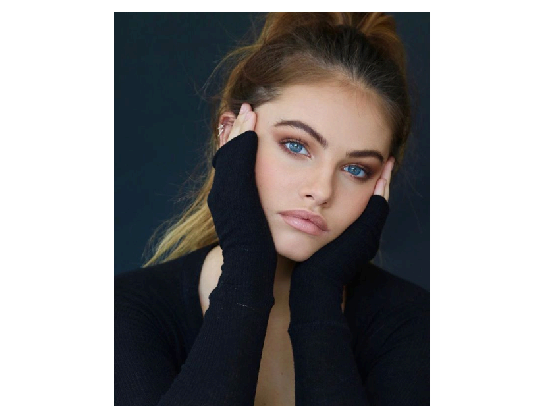

In [19]:
%imaginea initiala
imshow(image);

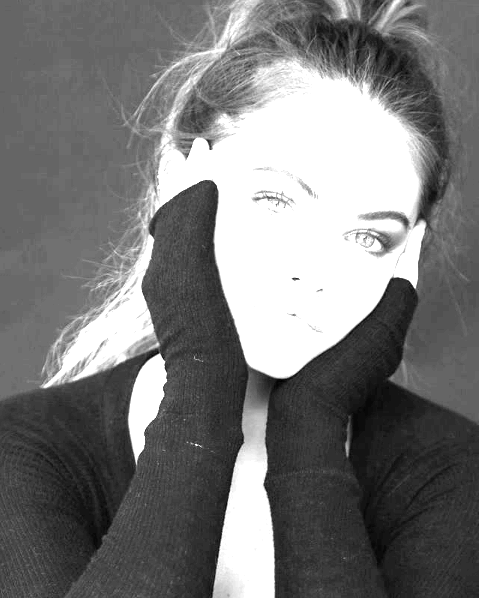

In [20]:
imshow((image(1:end, 1:end, 1) + image(1:end, 1:end, 2) + image(1:end, 1:end, 3)) / 3);


Observam deci ca poza nu arata totusi prea bine nici in acest caz.

Daca tot am invatat o gramada de chestii pana acum, mai putem vorbi pe scurt despre ceva nou, pentru a etala importanta Metodelor Numerice in viata de zi cu zi.

Exista o metoda de a obtine dintr-o poza in cod RGB o poza in cod YIQ. Pentru detalii, aveti urmatorul link: https://en.wikipedia.org/wiki/YIQ.

Vom crea o functie proprie my_rgb2gray, care ne va da o poza in format tip YIQ. Daca am citit in link-ul de mai sus, ceea ce ne intereseaza pe noi este componenta Y din YIQ, cea care ajuta la conversia alb-negru.

In [21]:
function new_img = my_rgb2gray(image)
    new_img = 0.298936 * image(1:end, 1:end, 1) + ...
    0.587043 * image(1:end, 1:end, 2) + ...
    0.114021 * image(1:end, 1:end, 3);
endfunction

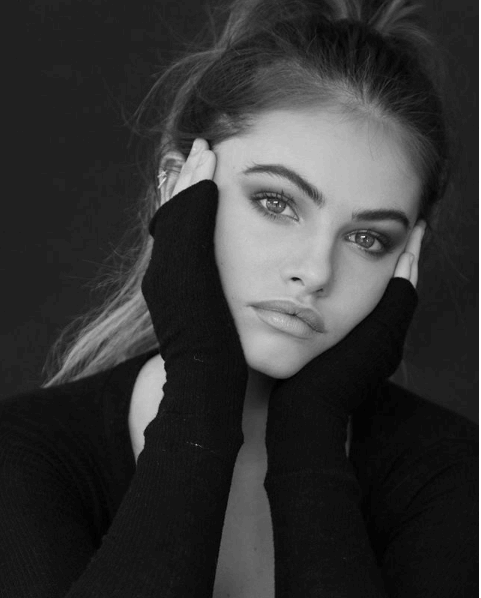

In [22]:
imshow(my_rgb2gray(image))

Cat de frumoasa si minunata este aceasta materie! Acele numere luate ca din burta corespund din sistemul From RGB to YIQ de pe wikipedia, in care Y este ecuatia data de acele numere de pe prima linie(noi le-am luat cu o precizie mai mare din alta parte, just for fun). R, G, B sunt codurile de culoare pentru un singur pixel, si formula ar iesi:
Y = 0,299 * R + 0,587 * G + 0,114 * B. Pentru un singur pixel. Pentru a nu ne mai complica cu atatea foruri, am vectorizat calculele din functia de mai sus, scotand-o astfel intr-o singura instructiune(pe mai multe randuri, ce-i drept).

Acum vom calcula matricea de covarianta a pozei. Observam ca matricea este deja pe inaltime mai mare decat pe latime, ceea ce ne ajuta, intr-o oarecare masura. (Gandim si lucram direct pe coloane).

In [23]:
image = my_rgb2gray(image);
C = cov(image);

Descompunerea SVD vine, din nou, de la sine:

In [24]:
[U S V] = svd(C);

Si, nu in ultimul rand, calculam matricea finala:

In [25]:
FinalMatrix = V' * image

error: binary operator '*' not implemented for 'matrix' by 'uint8 matrix' operations


Octave nu ne permite inmultirea a doua array-uri de tipuri diferite, asa ca vom face o mica conversie:

In [26]:
image = double(image);
FinalMatrix = image * V;

Acum ca am obtinut matricea FinalMatrix care contine componentele principale, sa vedem daca putem reobtine imaginea initiala.

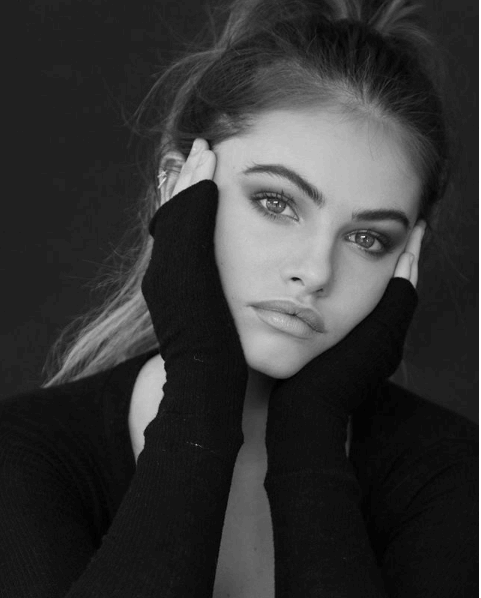

In [27]:
new_image = FinalMatrix * V';
new_image = uint8(new_image); %facem asta pentru ca acum avem o matrice cu elemente tip double
imshow(new_image)

Astfel, algoritmul PCA este finalizat cu succes.

# Reducere dimensionala $\longrightarrow$ compresia unei imagini

Avand exemplul de mai sus, hai sa vedem cu putem sa "reducem" dimensiunile matricilor V si FinalMatrix, fara a pierde insa capacitatea de a reobtine poza. !! Atentionam inca de pe acum ca poza initiala si cea obtinuta dupa reducerea dimensionala nu vor mai fi aceleasi, desi poate vizibil vor parea inca identice.

Vrem sa facem un studiu pe valorile singulare, ca sa observam anumite aspecte. Vom rula din nou algoritmul svd, fara a mai da parametrii insa:

In [28]:
sing_values = svd(C)

sing_values =

   6.3163e+05
   1.0666e+05
   6.3455e+04
   4.1476e+04
   3.1817e+04
   2.2439e+04
   1.4312e+04
   1.2495e+04
   1.0840e+04
   8.5832e+03
   6.8145e+03
   4.8342e+03
   4.6094e+03
   3.5091e+03
   3.0057e+03
   2.5963e+03
   2.3381e+03
   2.1598e+03
   2.0650e+03
   1.9561e+03
   1.4469e+03
   1.4391e+03
   1.3859e+03
   1.1474e+03
   1.0356e+03
   8.9286e+02
   8.5287e+02
   7.1966e+02
   6.6610e+02
   6.2232e+02
   5.8510e+02
   5.4530e+02
   5.1194e+02
   4.6617e+02
   4.5116e+02
   4.1708e+02
   4.0043e+02
   3.5718e+02
   3.4848e+02
   3.4051e+02
   3.2762e+02
   3.0654e+02
   2.7431e+02
   2.6208e+02
   2.5994e+02
   2.4299e+02
   2.2225e+02
   2.1070e+02
   2.0357e+02
   1.9977e+02
   1.9127e+02
   1.7807e+02
   1.7294e+02
   1.5821e+02
   1.5427e+02
   1.4363e+02
   1.4045e+02
   1.3809e+02
   1.3356e+02
   1.2939e+02
   1.2686e+02
   1.2215e+02
   1.1906e+02
   1.1564e+02
   1.1114e+02
   1.0548e+02
   1.0514e+02
   1.0151e+02
   9.6404e+01
   9.5216e+01
   9.

Vedem ca multe dintre valorile singulare de la sfarsit sunt fie 0, fie extrem de mici in comparatie cu primele valori singulare. Reducerea dimensionala presupune eliminarea a ultimelor k <b><u>COLOANE</b></u> din matricea V. Automat, si matricea FinalMatrix va avea o dimensionalitate diferita.

Hai sa vedem dimensiunile initiale ale imaginii, matricei V si FinalMatrix, precum si numarul de valori singulare existente(cel din urma este folosit doar pentru a intelege mai bine anumite aspecte; dupa finalizarea programului, noi o sa retinem doar V si FinalMatrix):

In [29]:
size(image)
size(V)
size(FinalMatrix)
size(sing_values)

ans =

   598   481

ans =

   481   481

ans =

   598   481

ans =

   481     1



O teorema interesanta ne da o formula prin care putem face reducere dimensionala fara a pierde, in mod sesizabil, calitatea imaginii initiale. Ce ne da aceasta teorema, in caz general, este o aproximare a setului initial de date. Subliniem cuvantul-cheie <u>aproximare</u>.

$\frac{\sum_{i=1}^{k}s_i}{\sum_{j=1}^{n}s_j} \ge 99\%$, unde k reprezinta numarul minim de valori singulare pentru care se realizeaza cele de mai inainte, iar n reprezinta numarul total de valori singulare. 

In [30]:
%functie care calculeaza cate valori singulare putem lua
%pentru a avea o aproximare satisfacatoare

function res = first_useful_sing_val(sing_values)
    total_sum = sum(sing_values);
    reduct_sum = 0;
    i = 0;
    %puteti sa va jucati cu limita data, in cazul nostru, 0.99
    while reduct_sum / total_sum <= 0.99
        i++;
        reduct_sum += sing_values(i);
    endwhile
    res = i;
endfunction

In [31]:
k = first_useful_sing_val(sing_values)

k =  37


37! Sunt necesare doar 37 valori singulare din 481 initiale pentru a crea o imagine aproximativ identica cu cea initiala!!!

In [32]:
new_V = V(1:end, 1:37);
new_FinalMatrix = image * new_V;
size(new_V)
size(new_FinalMatrix)

ans =

   481    37

ans =

   598    37



Noua imagine obtinuta va avea forma:

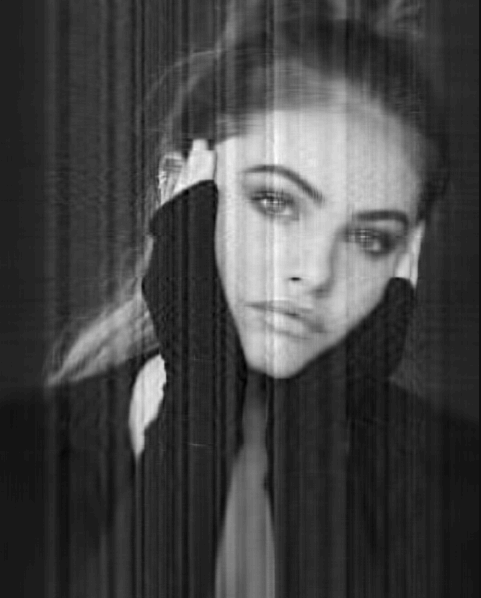

In [33]:
reduct_img = new_FinalMatrix * new_V';
imshow(reduct_img)

Observam ca imaginea nu este cea mai clara imagine posibila, dar seamana izbitor cu cea initiala.
Mai facem un test, de data asta pentru 100 de valori singulare din cele 481.

In [34]:
new_V = V(1:end, 1:100);
new_FinalMatrix = image * new_V;
size(new_V)
size(new_FinalMatrix)

ans =

   481   100

ans =

   598   100



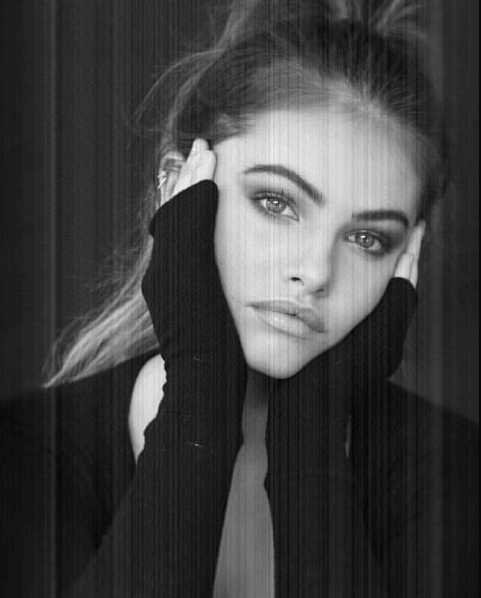

In [35]:
reduct_img = new_FinalMatrix * new_V';
imshow(reduct_img)

Chiar si mai clara ca inainte. Tot jucandu-ne cu reducerea, putem considera ca, undeva pe la k = 249, ca deja nu mai este vizibila vreo diferenta cu ochiul liber, acestea existand insa daca ar fi sa comparam cu un program diferentele.

In [36]:
new_V = V(1:end, 1:249);
new_FinalMatrix = image * new_V;
size(new_V)
size(new_FinalMatrix)

ans =

   481   249

ans =

   598   249



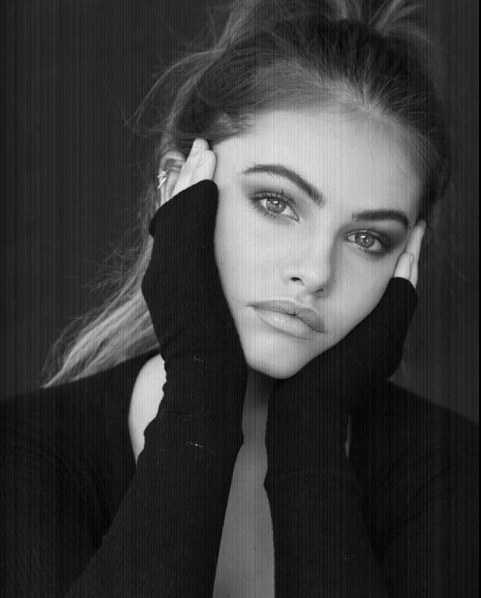

In [37]:
reduct_img = new_FinalMatrix * new_V';
imshow(reduct_img)

Diferentele abia daca se gasesc in liniile de fundal, acestea putand fiind eliminate daca luam doar portretul persoanei, nu si fundalul din spate.
Hai sa vedem si cu cat a fost redusa poza initiala, din punct de vedere a dimensionlaitatii.

In [38]:
%calculam numarul de elemente folosind functia numel:
dim_new_V = numel(new_V)
dim_new_FinalMatrix = numel(new_FinalMatrix)
new_img_dim = dim_new_V + dim_new_FinalMatrix
old_img_dim = numel(image)

dim_new_V =  119769
dim_new_FinalMatrix =  148902
new_img_dim =  268671
old_img_dim =  287638


Vedem ca diferenta de dimensionalitate exista intr-adevar, aceasta fiind de aproximativ 20.000 de asa-zisi "pixeli". Daca un pixel, sa zicem, ar ocupa 1 octet, atunci avem o reducere a dimensiunii de 20000 bytes = 20kb dintr-o poza   initiala de 287kb. Ceea ce nu pare deloc rau.

Ca tema de casa, lasam crearea unui algoritm PCA, care sa foloseasca reducere dimensionala, ce va primi ca parametri o imagine si va returna imaginea comprimata

In [39]:
function compressed_image = image_compression(image)
endfunction